# 3. Basic Workflow Demo: Plotting A Monthly Mean Map
 
To demonstrate the simplicity of using xarray, we first provide a very simple example. Here we will read a netCDF data, operate a simple statistical computation, and plotting a map. 

**Example 1. Regional monthly OLR map (outgoing longwave radiation, OLR) in December 2017：** The workflow is as follows: 
1. Open and read the file. 
2. Select the specific spatial and temporal range. 
3. Mean over time. 
4. Plot the result.

```{note}
In this unit, please set the plotting extent within 0˚-180˚. To plot a map outside this range is rather complicated and we will learn in Unit 9. 
```

## Open the File and Slicing

In [10]:
import numpy as np
import xarray as xr 

# Set the parameters of temporal range and spatial extent. 
lats, latn = -20, 30
lon1, lon2 =  79, 161 
time1 = '2017-12-01'
time2 = '2017-12-31'

# 開啟檔案
olr_ds = xr.open_dataset("data/olr.nc")
olr = (olr_ds.sel(time=slice(time1,time2),
                  lat=slice(lats,latn),
                  lon=slice(lon1,lon2)).olr)    # To extract the olr variable from the dataset. 
                                                # Here, the olr becomes a "DataArray". 

olr

<xarray.DataArray 'olr' (time: 31, lat: 50, lon: 82)> Size: 508kB
[127100 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 248B 2017-12-01 2017-12-02 ... 2017-12-31
  * lon      (lon) float32 328B 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 200B -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      NOAA Climate Data Record of Daily Mean Upward Longwave Fl...
    units:          W m-2
    cell_methods:   time: mean area: mean

Here, we extract the OLR data into an `xarray.DataArray` from the `xarray.Dataset`. What is the difference between an `xarray.DataArray` and an `xarray.Dataset`? An `xarray.DataArray` includes an array with dimensions, coordinates, variable name, and attributes. On the other hand, an `xarray.Dataset` can include multiple DataArrays (as shown by the cubes of temperature and precipitation in the figure below).

![Dataset Diagram](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

In the code above, we also demonstrate how to slice data using the `sel` method. The biggest difference between `xarray.DataArray` and `numpy.array` is that a DataArray contains coordinates, allowing us to slice data with actual time and geographical spatial range, whereas a `numpy.array` does not. Using xarray, we don't have to count which elements are located at 25˚S and 25˚N (known as "select by integer"). In addition to the `sel` method, one can still select data by integer. The methods are summarized in the following table from [xarray's tutorial](https://xarray.pydata.org/en/stable/user-guide/indexing.html).

![Indexing Methods](https://i.imgur.com/fko7ZLv.png)

```{note}
Positional index selection cannot be done with a Dataset. This is because a Dataset can contain multiple DataArrays with different coordinates. Positional index selection may lead to confusion.
```

```{caution}
In the above example, we write `lat=slice(lats, latn)`. However, the order of `lats` and `latn` is actually determined by the order in the netCDF file. If the latitude coordinate in the file is ordered from north to south, we have to write `lat=slice(latn, lats)`. Otherwise, the latitude coordinate will be empty. 
```

## Analysis and Computation

Next, we have to compute the average over the time coordinate. In xarray, the method to calculate the average is `mean()`. We have to specify the dimension or the axis to average by adding the option `dim='time'` or `axis=0`. Otherwise, it will calculate the mean over the entire array.

In [11]:
# The time coordinate is at the 0th axis. Therefore, we set axis=0.                    
olrm = olr.mean(axis=0)
olrm

<xarray.DataArray 'olr' (lat: 50, lon: 82)> Size: 16kB
array([[287.4708 , 287.87192, 286.90723, ..., 271.47592, 269.68332,
        266.63043],
       [285.6799 , 285.8262 , 286.34995, ..., 268.567  , 266.5395 ,
        263.9603 ],
       [282.36685, 283.75674, 285.1209 , ..., 267.8831 , 264.08185,
        260.59106],
       ...,
       [262.47873, 264.25   , 263.49432, ..., 269.69827, 271.77063,
        273.64374],
       [261.1402 , 261.74628, 260.309  , ..., 260.9607 , 262.55548,
        263.67596],
       [253.06664, 249.58241, 238.8812 , ..., 252.71883, 254.02852,
        255.21298]], dtype=float32)
Coordinates:
  * lon      (lon) float32 328B 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 200B -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5

Alternatively, 

In [12]:
# Specify the dimension name to average.                    
olrm = olr.mean(dim='time')
olrm

<xarray.DataArray 'olr' (lat: 50, lon: 82)> Size: 16kB
array([[287.4708 , 287.87192, 286.90723, ..., 271.47592, 269.68332,
        266.63043],
       [285.6799 , 285.8262 , 286.34995, ..., 268.567  , 266.5395 ,
        263.9603 ],
       [282.36685, 283.75674, 285.1209 , ..., 267.8831 , 264.08185,
        260.59106],
       ...,
       [262.47873, 264.25   , 263.49432, ..., 269.69827, 271.77063,
        273.64374],
       [261.1402 , 261.74628, 260.309  , ..., 260.9607 , 262.55548,
        263.67596],
       [253.06664, 249.58241, 238.8812 , ..., 252.71883, 254.02852,
        255.21298]], dtype=float32)
Coordinates:
  * lon      (lon) float32 328B 79.5 80.5 81.5 82.5 ... 157.5 158.5 159.5 160.5
  * lat      (lat) float32 200B -19.5 -18.5 -17.5 -16.5 ... 26.5 27.5 28.5 29.5

`olr` is now reduced to a 2-dimension array. 

## Plotting

Next, we plot the `olrm` with a contour map.

### Settings in `matplotlib`

Matplotlib is one of the core libraries in PyAOS. To plot with Python/Matplotlib, we need to create a `fig` (which can be imagined as a canvas). At the same time, we can specify the number of **subplots** (usually represented by `ax`) on the canvas. The command to create `fig` and `ax` is as follows:

```
matplotlib.pyplot.subplots(nrows, ncols,...)
```

This will create the layout of the subplots according to the number of rows `nrows` and columns `ncols` that the user specifies. For multiple subplots, we will learn in Unit 9. Currently, just set `nrows=1` and `ncols=1`. For example,


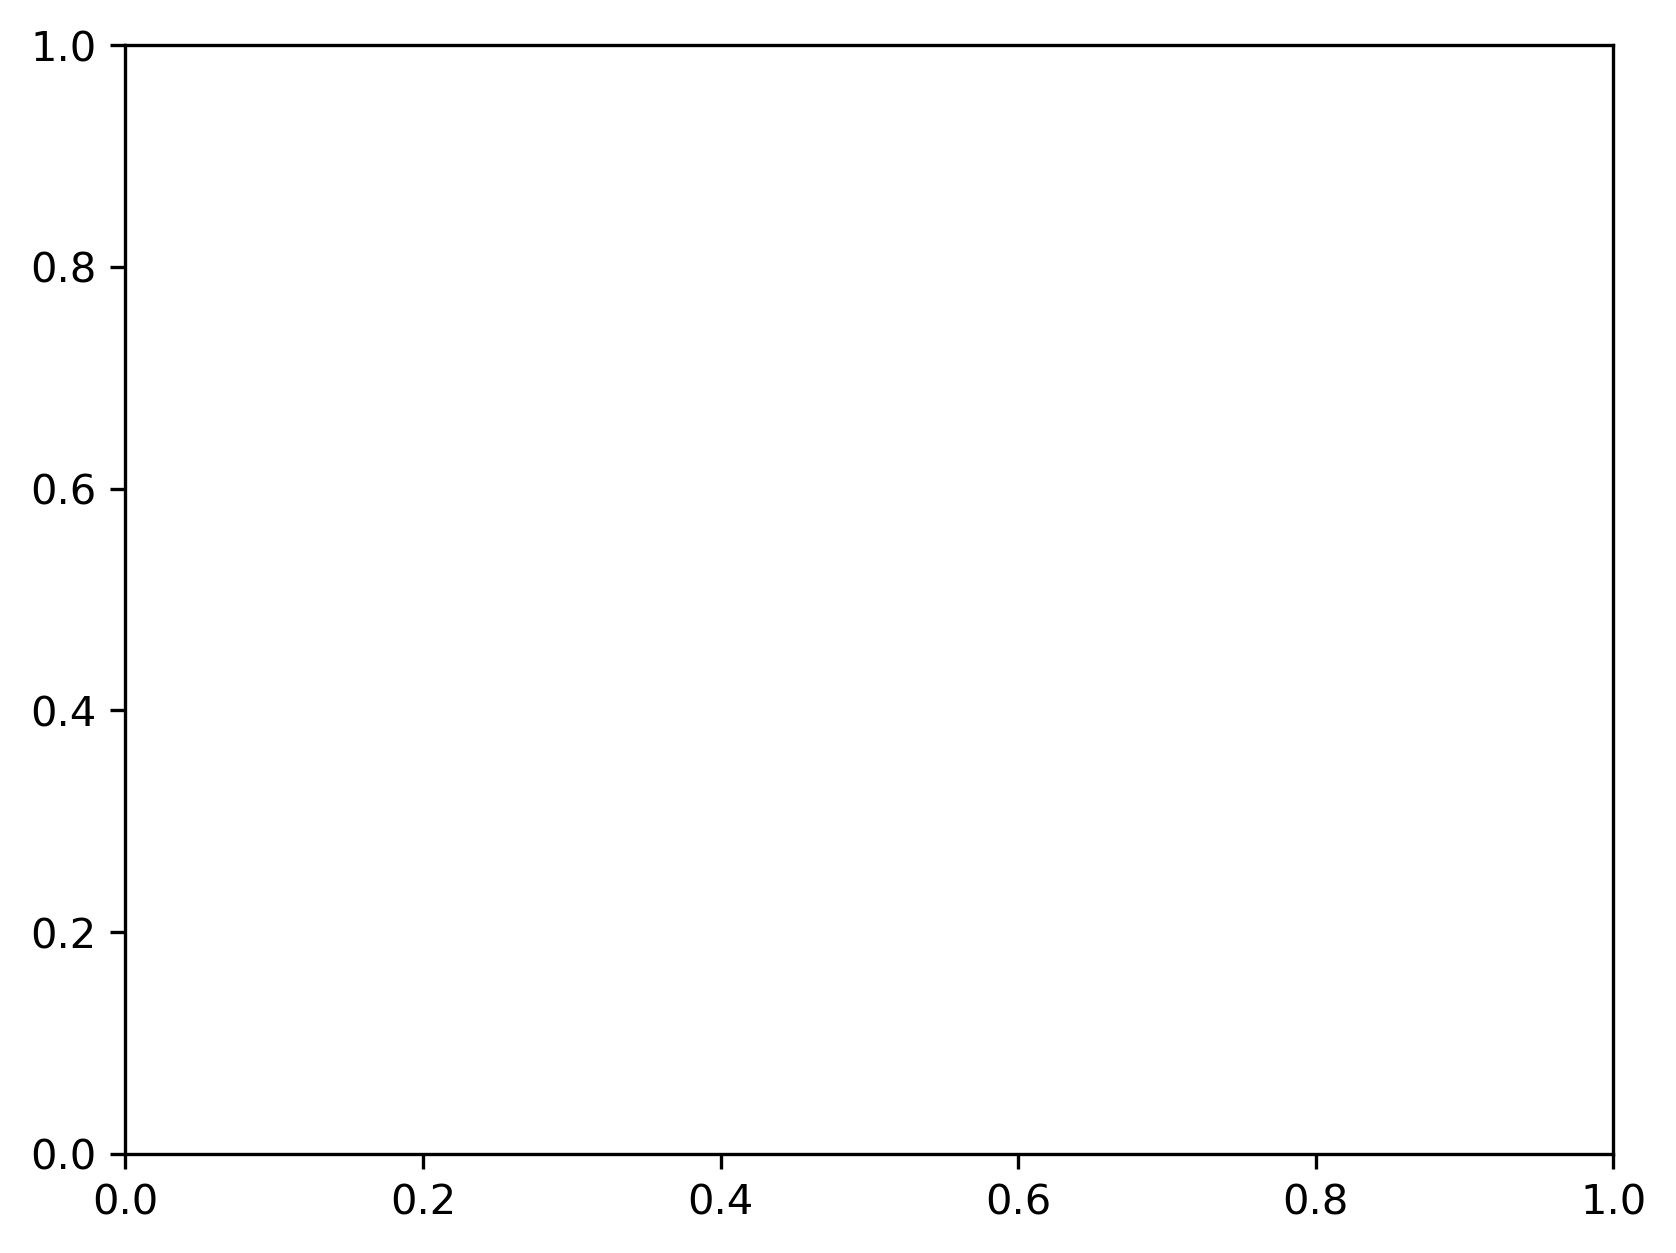

In [13]:
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams['figure.dpi'] = 300 # Set figure resolution. For acadamic publication, this should be set to 300. 

fig,ax=plt.subplots(1,1)

### Plot Method in xarray

We use the built-in method from `xarray.Dataset` and `xarray.DataArray` to plot on the subplot `ax` we have created. To plot the fill contour plot, we use the `xarray.DataArray.plot.contourf()` method. Other plotting methods include `xarray.plot.pcolormesh()`, `xarray.plot.contour()`, etc. We will learn about them in Units 8 and 9. Here is the example code to plot the monthly mean of OLR in December 2017. 

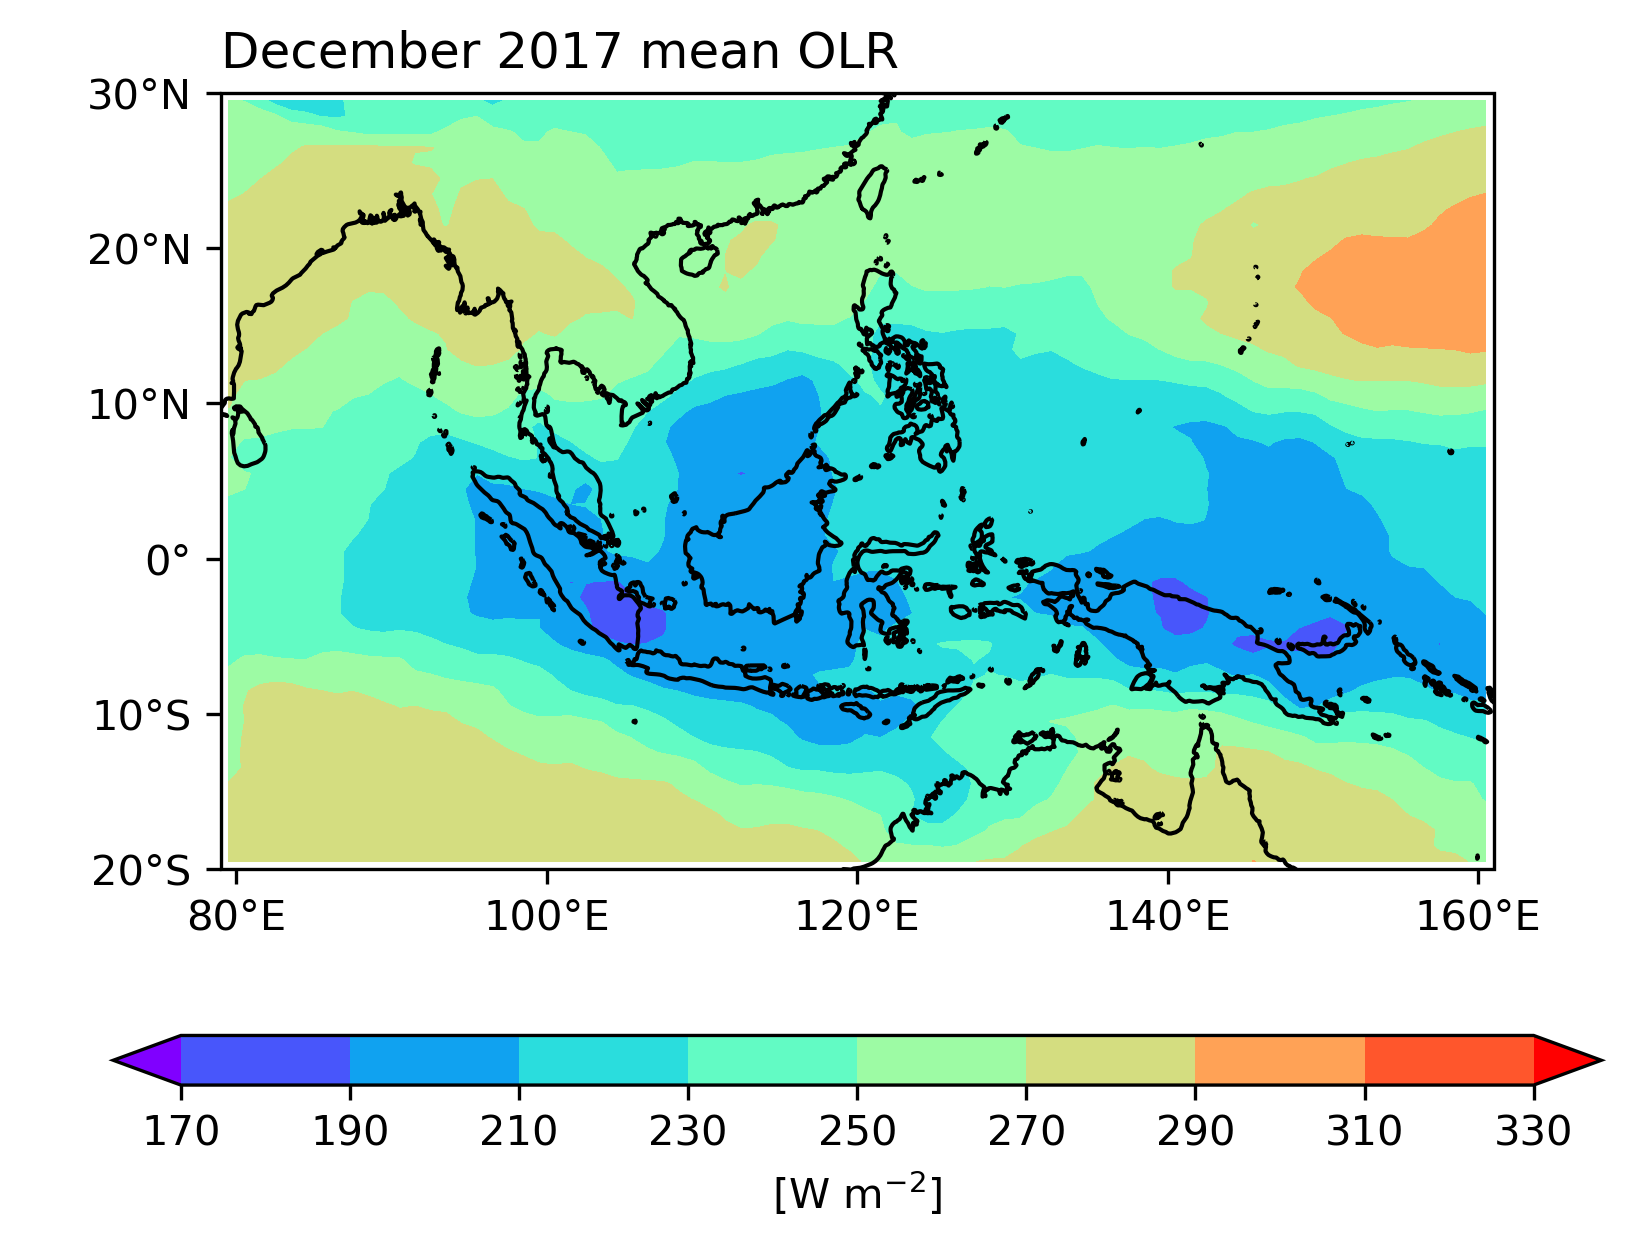

In [14]:
from cartopy import crs as ccrs   
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Plot settings
proj = ccrs.PlateCarree()      # Specify a Equirectangular projection map. 
fig,ax = plt.subplots(1,1,subplot_kw={'projection':proj})   

clevs = np.arange(170,350,20)

# 繪圖    
olrPlot = (olrm.plot.contourf(x="lon",            # Specify the dimension name for x and y axes on the plot.
                              y="lat",            # Note that we don't have to provide the coordinate! 
                              transform=proj,     # Please do so. We will explain in Unit 8.
                              ax=ax,              # Plot this on the subplot `ax`. 
                              levels=clevs,       # Setting the contours level. 
                              cmap='rainbow',     # Setting the colormap. 
                              add_colorbar=True,  # Plot the colorbar or not. 
                              extend='both',      # If the colormap extend or not. See API for details. 
                              cbar_kwargs={'orientation': 'horizontal', 'aspect': 30, 'label': r'[W m$^{-2}$]'}) # More settings for color bar
                              )

ax.set_extent([lon1,lon2,lats,latn],crs=proj)  # Set the extent for the plot
ax.set_xticks(np.arange(80,180,20), crs=proj)  # Set the ticks of x, y axes on the plot. 
ax.set_yticks(np.arange(-20,40,10), crs=proj)  
lon_formatter = LONGITUDE_FORMATTER
lat_formatter = LATITUDE_FORMATTER   
ax.xaxis.set_major_formatter(lon_formatter)  # To express the latitude and longitude range using degrees. 
ax.yaxis.set_major_formatter(lat_formatter)  
ax.coastlines()                # Plot coastline.                               
ax.set_ylabel(' ')             # Set the name of the coordinate. 
ax.set_xlabel(' ')
ax.set_title(' ') # A default title will be given by xarray. Set blank to remove that. 
ax.set_title(r"December 2017 mean OLR", loc='left') # Set the title for the plot and set in the left corner. 
plt.show()
#plt.savefig("olr_mean_201712.png", dpi=600)  # This command is to save figure into .png file. 

We can compare the syntax here to the combination of `numpy.array` and `matplotlib`. Using `matplotlib`, the syntax is:

> contourf([X, Y,] Z, [levels], **kwargs) 

The longitude and latitude coordinates should be manually given. However, if using xarray, as long as the dimension names are given, the function will automatically retrieve the information of the coordinates and provide it to the `matplotlib` plotting function. Additionally, the axes labels on the plot will also be retrieved from the DataArray. Therefore, the plotting workflow can become simple and elegant.

Additional Notes:

1. Cartopy is a library for addressing map projection methods. When opening the `ax`, we need to specify the map projection method by adding the keyword argument `subplot_kw={'projection': proj}`.
2. Colormap: `cmap` can be one of the [Matplotlib colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html).
3. In addition to the colormaps of Matplotlib, NCAR Command Language (NCL) provides more options for color tables. See [NCL Color Table Gallery](https://www.ncl.ucar.edu/Document/Graphics/color_table_gallery.shtml#matplotlib). To use them, import the `cmaps` package into the code. The syntax here is `cmaps.[color_table_name]`. For example, if we'd like to use the color table named "GMT_seis", just set `cmap=cmaps.GMT_seis` in the `plot.contourf` method.

## Summary

In the above example, we demonstrate how to calculate and plot the monthly mean of OLR by opening a netCDF file, analyzing the data, and visualizing the result, which are the most fundamental steps in climate analysis. Xarray is a very convenient tool. It simplifies the workflow and makes the code very elegant.